In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [3]:
image = mpimg.imread('data/exit-ramp.jpg')

In [4]:
np.shape(image)

(540, 960, 3)

In [5]:
def show_image(img, cmap=None):
    plt.imshow(img, cmap=cmap)
    plt.show()

def show_grey_image(img, cmap="Greys_r"):
    show_image(img, cmap)

In [6]:
# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

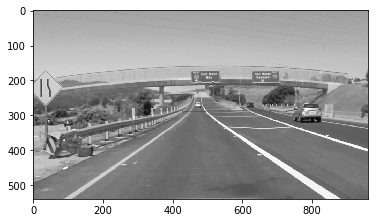

In [7]:
show_grey_image(gray)

In [8]:
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

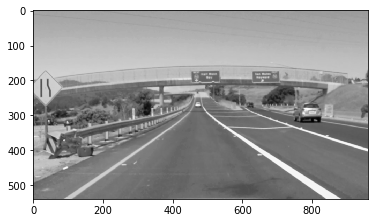

In [9]:
show_grey_image(blur_gray)

In [195]:
low_threshold = 50
high_threshold = 150

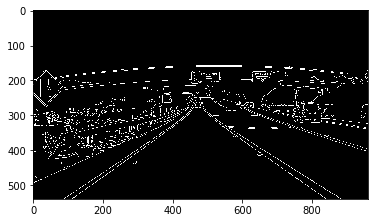

In [196]:
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
show_grey_image(edges)

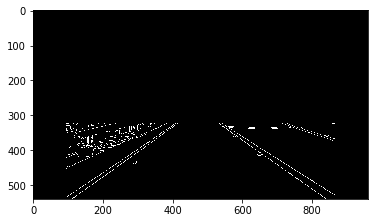

In [260]:
mask = np.zeros_like(edges)
ignore_mask_color = 255

imshape = image.shape

imshape

vertices = np.array([
    [
         (imshape[1] * 0.1, imshape[0] * 0.6),
         (imshape[1] * 0.1, imshape[0]),
         (imshape[1] * 0.9, imshape[0]),
         (imshape[1] * 0.9,imshape[0] * 0.6)]
    ], dtype=np.int32)

vertices

cv2.fillPoly(mask, vertices, ignore_mask_color)

masked_edges = cv2.bitwise_and(edges, mask)

show_grey_image(masked_edges)

In [261]:
import math

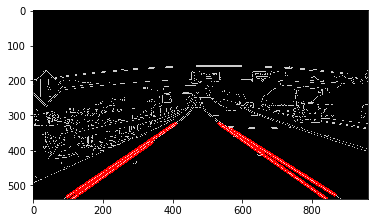

In [265]:
rho = 1
theta = np.pi/180 #1 degree = pi/180 radians

intersection_threshold = 210

min_line_length = 10 #min pixels makin up a line
max_line_gap = 500 #max gap in pixels between connectable line segments

line_image = np.copy(image)*0

# * Points in the image space are converted to sine curves in the hough space.
# * Points of intersections are found in the hough space - these represent lines in the image space.
# * These points are then converted back into the image space and the line segment between the top-most point and the bottom-most point are returned as x1,y1 and x2,y2

hough_points_image_lines = cv2.HoughLinesP(masked_edges, 
                                           rho, 
                                           theta, 
                                           intersection_threshold, 
                                           np.array([]),
                                           min_line_length,
                                           max_line_gap)

# * Create a new image (line_image) which will have the detected lines

for line in hough_points_image_lines:
    for x1, y1, x2, y2 in line:
        cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)

# show_image(line_image)

color_edges = np.dstack((edges, edges, edges))

lines_edges = cv2.addWeighted(color_edges, 0.8, line_image, 1, 0)


show_image(lines_edges)